# OpenEO Connection to EURAC Backend

In [1]:
import openeo
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
# Define constants

# Connection
EURAC_DRIVER_URL = "http://saocompute.eurac.edu/openEO_WCPS_Driver/openeo"
OUTPUT_FILE = "/tmp/openeo-wcps.nc"
OUTFORMAT = "netcdf"

# Data
PRODUCT_ID = "S2_L2A_T32TPS_20M"

DATE_START = "2017-01-01"
DATE_END = "2017-01-31"

IMAGE_LEFT = 652000
IMAGE_RIGHT = 672000
IMAGE_TOP = 5161000
IMAGE_BOTTOM = 5181000
IMAGE_SRS = "EPSG:32632"

# Processes
NDVI_RED = "B04"
NDVI_NIR = "B8A"


In [3]:
# Connect with EURAC backend
session = openeo.session("nobody", EURAC_DRIVER_URL)
session

In [4]:
# Retrieve the list of available collections
collections = session.imagecollections()

list(collections)[:5]

[{'product_id': 's1a_t117_epsg3035_20m_VV'},
 {'product_id': 'S2_L2A_T32TQS_10M'},
 {'product_id': 'S2_L2A_T32TQS_20M'},
 {'product_id': 'S2_L2A_T32TPT_20M'},
 {'product_id': 'S2A_L2A_NDVI_T32TPS'}]

In [5]:
# Select collection product
s2_fapar = session.image(PRODUCT_ID)

s2_fapar

In [6]:
# Specifying the date range and the bounding box
download = s2_fapar \
    .bbox_filter(left=IMAGE_LEFT, right=IMAGE_RIGHT, top=IMAGE_TOP, bottom=IMAGE_BOTTOM,srs=IMAGE_SRS) \
    .date_range_filter(DATE_START, DATE_END) \
    .ndvi(NDVI_RED, NDVI_NIR) \
    .max_time() \
    .download(OUTPUT_FILE,format=OUTFORMAT)
    
download

In [7]:
# Showing the result
!gdalinfo -hist "/tmp/openeo-wcps.nc"

Warning 1: No UNIDATA NC_GLOBAL:Conventions attribute
Driver: netCDF/Network Common Data Format
Files: /tmp/openeo-wcps.geotiff
Size is 1000, 1000
Coordinate System is `'
Origin = (5181000.000000000000000,672000.000000000000000)
Pixel Size = (-20.000000000000000,-20.000000000000000)
Metadata:
  B8A#missing_value=NaN
  B8A#units=10^0
Corner Coordinates:
Upper Left  ( 5181000.000,  672000.000) 
Lower Left  ( 5181000.000,  652000.000) 
Upper Right ( 5161000.000,  672000.000) 
Lower Right ( 5161000.000,  652000.000) 
Center      ( 5171000.000,  662000.000) 
Band 1 Block=1000x1 Type=Float64, ColorInterp=Undefined
0...10...20...30...40...50...60...70...80...90...100 - done.
  256 buckets from -0.644596 to 1.00151:
  24 261 339 162 371 698 1587 2435 2713 2929 3895 5994 7619 8645 8317 8072 8110 8293 8917 8935 7952 6566 5601 4541 4000 3233 3036 2665 2390 2037 2120 2133 2076 2075 1828 1643 1596 1512 1406 1248 1258 1212 1126 1087 1063 1078 1058 1121 1074 1014 1004 913 879 774 780 678 637 571 538 

odict_keys(['B8A', 'E', 'N'])
<class 'netCDF4._netCDF4.Variable'>
float64 B8A(E, N)
    missing_value: NaN
    units: 10^0
unlimited dimensions: 
current shape = (1000, 1000)
filling off



/data/.pyenv/versions/miniconda3-latest/envs/openeo-client/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  del sys.path[0]


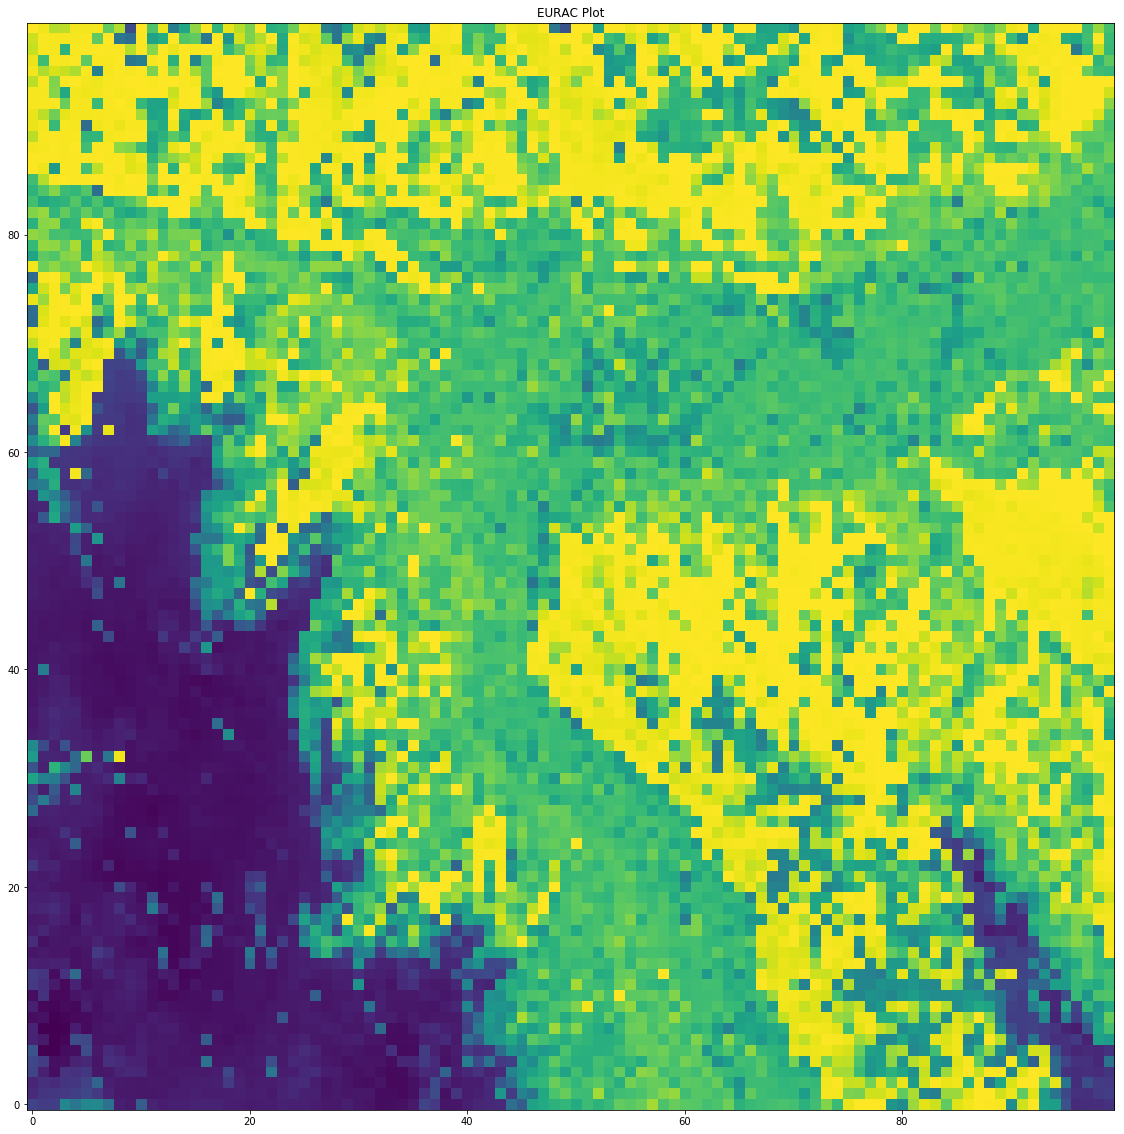

In [11]:
import matplotlib.pyplot as plt
import netCDF4

# open a local NetCDF file or remote OPeNDAP URL
url = '/tmp/openeo-wcps.nc'
nc = netCDF4.Dataset(url)

# examine the variables
print (nc.variables.keys())
print (nc.variables['B8A'])

# sample every 10th point of the 'B8A' variable
topo = nc.variables['B8A'][::10,::10]

# make image
plt.figure(figsize=(20,20))
plt.imshow(topo,origin='lower') 
plt.title('EURAC Plot')
plt.savefig('/tmp/image.png', bbox_inches=0)